# 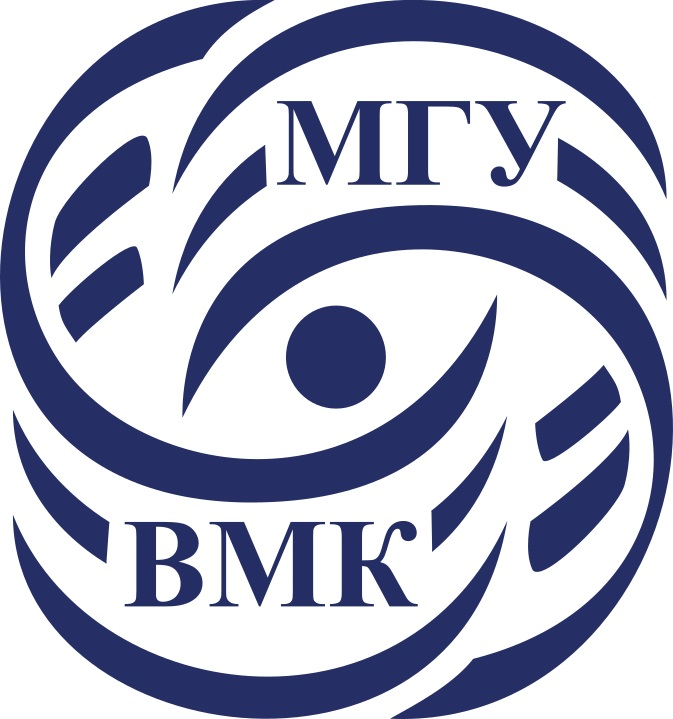

# Машинное обучение. ВМК МГУ

# Практическое задание 8: Частичное Обучение. Методы снижения размерности.
## Уровень: <font color='MediumSeaGreen'>**Исследовательский (Research)**</font>


# О формате сдачи

🔷 **<font color='plum'>При решении ноутбука используйте данный шаблон</font>**

    ✅ Можно добавлять новые ячейки любых типов
    ❌ Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий


🔷 **<font color='plum'>При оценивании задач учитывается код</font>**

    ✅ Задания, в которых необходим код, обычно помечаются фразами "Your code here"/"Ваш код" и аналогичными
    ❌ Ответы на вопросы без сопутствующего кода оцениваются в 0 баллов
    ❌ Наличе работоспособного кода в ноутбуке, если на сказано иного, обязательно

🔷 **<font color='plum'>При оценивании задач учитываются выводы</font>**

    ✅ Задания, в которых необходимы выводы, обычно помечаются фразами Вывод"/"Ответ на вопрос"/"Ваш текст" и аналогичными
    ✅ Обычно выводы подразумевают под собой текстовый ответ (можно писать markdown, latex).
    ✅ Сопутствующие изображения, графики, таблички - приветствуются!
    ❌ При отсутствии выводов задание не засчитается на полный балл

-----------
<font color="white" style="opacity:0.2024"></font>









<font color="white" style="opacity:0.2024"></font>
<font color=DarkOrange>**Примерное время выполнения (execution time/время выполнения, если нажать run all) всех ячеек ноутбука при правильной реализации: 60 минут </font>**

----------------------------------------------
<font color="white" style="opacity:0.2023"></font>

Перед началом выполнения переведите ноутбук в `Доверенный режим` (`Trusted`) для корректного отображения изображений:

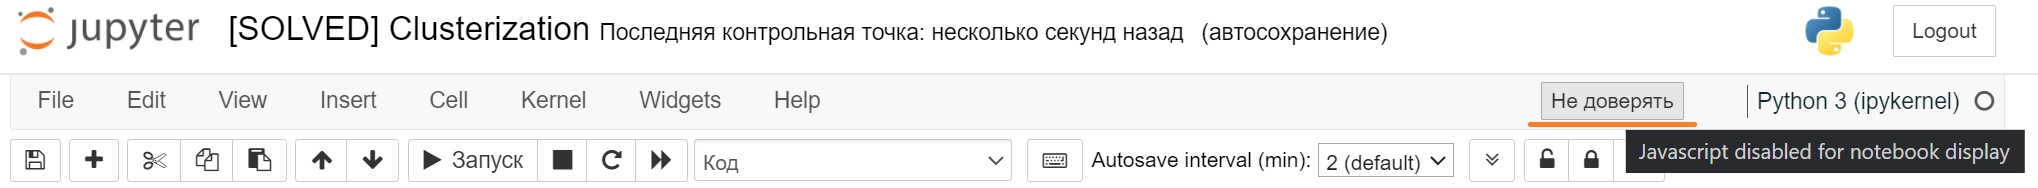

In [ ]:
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

# 0. Введение.

# Подготовка рабочей среды

Сначала установим нужные нам версии библиотек. Мы гарантируем, что в данных версиях задание будет корректно отрабатывать.

После установки нужных версий, **возможно,** нужно перезагрузить среду (runtime), но скорее всего вам это не понадобится


На скачивание файла и установку понадобится не более 5 минут.

<font color='OrangeRed'>**Важно!**</font>

Устанавливать нужные версии нужно каждый раз, когда создается новый рантайм. Например, если вы 2 часа подряд делаете это задание, то подготовить библиотеки достаточно 1 раз. Но если вы, например, начали в понедельник, затем закрыли/выключили ноутбук, то при продолжении в среду, вам нужно будет запустить рантайм заново и следовательно заново установить библиотеки.

<font color='OrangeRed'>**Важно!**</font>
Если вы предпочитаете делать практические задания на своем личном ноутбуке, то проверьте, что вы установили рабочее окружение в [соответствии с гайдом](https://github.com/MSU-ML-COURSE/ML-COURSE-24-25/blob/main/tutorials/%D0%A2%D1%83%D1%82%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%20%D0%BF%D0%BE%20%D1%83%D1%81%D1%82%D0%B0%D0%BD%D0%BE%D0%B2%D0%BA%D0%B5%20%D1%80%D0%B0%D0%B1%D0%BE%D1%87%D0%B5%D0%B3%D0%BE%20%D0%BE%D0%BA%D1%80%D1%83%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B2%20Python%20%D0%B4%D0%BB%D1%8F%20%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%20(2).pdf)

-----

<font color='OrangeRed'>**Важно!**</font> В этом задании мы будем использовать полное виртуальное окружение, так как понадобятся библиотеки `torch` и `tensorflow`

Обратите внимание, что установка `torch` и `tensorflow` через `pip `может сломать ваше окружение, особенно если вы используете GPU. Выполняйте их установку в соответствии с Вашей конфигурацией системы или в отдельном виртуальном окружении

In [1]:
# !!! Данный блок будет работать только в Google-Colab !!!
# ! gdown 19ZRLAdlNBI5OScrbxXzO3iaWJSkJlXeA
# ! pip install -r /content/requirements_2024_25_for_colab_full.txt

In [2]:
import catboost
assert(catboost.__version__ == '1.2.7')

Теперь можно приступать к выполнению задания! :)

-----------
<font color="white" style="opacity:0.2024"></font>

# О задании

В данной работе вам будет предложено применить кластеризацию и снижение размерности в задачах **Частичного Обучения** (Semi-Supervised learning).

Здесь перечислены основные функции и библиотеки, которые могут понадобиться Вам в процессе выполнения задания. Подключение других библиотек возможно, но нежелательно. **Работа каких-либо других библиотек не гарантируется.**

In [ ]:
import os

# Подавим уведомления о проблемах c tensorflow
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

import warnings

import numpy as np

import tqdm.auto as tqdm

import scipy.spatial.distance

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

from torchvision.datasets import MNIST

import sklearn

from sklearn.cluster import KMeans

from sklearn.linear_model import LogisticRegression
from sklearn.semi_supervised import SelfTrainingClassifier

# Библиотека umap-learn, а не umap
from umap import UMAP

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning

# Подавим уведомления о проблемах со сходимостью в sklearn
simplefilter("ignore", category=ConvergenceWarning)

**<font color='OrangeRed'>Обратите внимание</font>, что динамическое содержимое может некорректно сохраняться в jupyter notebook. Используйте его только для локальной визуализации. Все графики, необходимые для сдачи задания должны быть статическими. Переход в статический режим происходит с помощью магической команды `%matplotlib inline`.**

**<font color='OrangeRed'>Обязательно убедитесь, что все графики корректно сохранились корректно в ноутбуке перед сдачей в систему.</font>** Для этого достаточно открыть загруженный в систему файл и, просмотрев его, убедиться, что все сохранилось корректно

In [4]:
%matplotlib inline
matplotlib.rcParams['figure.dpi'] = 300

## Ещё несколько важных замечаний

При выполнении задания <font color='OrangeRed'>запрещено</font>:
1. Менять те seed, которые явно указаны в коде
2. Менять прототипы функций, классов, методов классов
3. Менять константы, используемые для генерации выборок

При оформлении задания обратите внимание на форматирование кода и на оформление графиков:

* Весь код должен быть оформлен в строгом соответствии с [PEP8](https://pep8.org/) (для юнит-тестов обязательно, для ноутбука очень желательно)

Графики должны быть с одной стороны понятными и информативными, а с другой стороны *красивыми*. Вот несколько пунктов, которые помогут удовлетворить этим требования:
1. Все графики должны быть отрисованы в **векторном формате**. Обратите внимание, что смена режима графиков с динамического на статический и обратно может приводить к сбросу параметров отрисовки графиков. Переход в векторный режим можно выполнить с помощью команды `matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'svg')`. Если изображения в векторном формате приводят к слишком большому размеру Jupyter Notebook можете использовать растровые изображения с **высоким dpi**. Напирмер, можно установить глобальный dpi в matplotlib: `matplotlib.rcParams['figure.dpi'] = 300`
2. На всех графиках без исключения должна быть нарисована сетка
3. Все графики и группы графиков должны иметь заголовок (`title`)
4. При необходимости оси должны быть подписаны
5. Если на графике отображено несколько сущностей (линии/точки/bar разных цветов, формы и так далее), то необходима исчерпывающая легенда
6. Все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном и так далее)
7. Масштаб по каждой оси на графике должен быть выбран правильно. Используйте масштабы `log`, `symlog` по необходимости
8. Если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах)
9. Частота отметок по каждой оси должна быть тщательно подобрана, по необходимости задавайте `[xy]ticks`, `[xy]ticklabels` вручную. Подписи тиков на осях не должны сливаться как на одной оси, так и между ними
10. Помните, что matplotlib умеет выполнять [рендеринг Latex](https://matplotlib.org/stable/gallery/text_labels_and_annotations/tex_demo.html). Используйте эту возможность для написания формул в заголовках, легенде и в подписях осей
11. Используйте *красивую* цветовую палитру с хорошо различимыми цветами. Примеры цветовых палитр можно посмотреть [здесь](https://matplotlib.org/stable/gallery/color/colormap_reference.html). При наличи особенностей восприятия цвета можно использовать специальные палитры:
```python
plt.style.use('seaborn-colorblind')
# Или
plt.style.use('tableau-colorblind10')
# Затем, при отрисовке графиков не используйте параметр cmap
```
12. Графики должны быть не супер-микро и не супер-макро по размерам, так, чтобы можно было увидеть все, что нужно

----------------------------------------------
<font color="white" style="opacity:0.2023"></font>

# <font color='DarkOrange'>**1. Частичное обучение.  [кросспроверка 6 баллов,  unittests 4 баллa]**</font>

В этой части мы рассмотрим применение алгоритмов снижения размерности и кластеризации в контексте задач классификации в постановке Semi-Supervised learning.

Рассмотрим задачу классификации изображений из датасета MNIST. Предположим, что известна только небольшая часть разметки по которой мы хотим обучить классификатор. В отличии от классических задач обучения с учителем здесь мы можем использовать большой объём неразмеченных объектов.

<font color='LightSteelBlue'>**Пояснение:**</font> Будем далее считать, что неразмеченные объекты имеют метку `-1`

Существует много вариантов решения данной задачи. Предлагается рассмотреть следующие из них:
1. Обучение модели, например, логистической регрессии на размеченной части
2. Методы SelfTraining, в частости `SelfTrainingClassifier` с логистической регрессией в качестве базовой модели
3. Использование кластеризации для определения групп похожих объектов и размеченной подвыборки для определения меток кластеров

Каждый из данных вариантов можно обучать на разных признаковых пространствах. Предлагается проверить, как методы снижения размерности будут влиять на качество итогового алгоритма. Нужно учесть, что не все алгоритмы снижения размерности допускают преобразование новых объектов в низкоразмерное пространство, поэтому предлагается сравнить `UMAP` с исходным признаковым пространством.


#### <font color='DarkOrange'>**Задание 1.1 [unittests, 4 баллa]**</font>

Реализуйте третью из предложенных моделей. Подробная спецификация и описание входных данных к тестам указаны в <font color='DarkSeaGreen'>**описании задания**.</font>

<font color='OrangeRed'>**Замечание:**</font> В данном пункте разрешено использовать `sklearn.cluster.KMeans`

In [ ]:
class KMeansClassifier(sklearn.base.BaseEstimator):
    def __init__(self, n_clusters):
        '''
        :param int n_clusters: Число кластеров которых нужно выделить в обучающей выборке с помощью алгоритма кластеризации
        '''
        super().__init__()
        self.n_clusters = n_clusters

        # Ваш код здесь:＼(º □ º l|l)/
        self.model = KMeans(n_clusters=n_clusters, random_state=42)

    def fit(self, data, labels):
        '''
            Функция обучает кластеризатор KMeans с заданным числом кластеров, а затем с помощью
        self._best_fit_classification восстанавливает разметку объектов

        :param np.ndarray data: Непустой двумерный массив векторов-признаков объектов обучающей выборки
        :param np.ndarray labels: Непустой одномерный массив. Разметка обучающей выборки. Неразмеченные объекты имеют метку -1.
            Размеченные объекты могут иметь произвольную неотрицательную метку. Существует хотя бы один размеченный объект
        :return KMeansClassifier
        '''
        # Ваш код здесь:＼(º □ º l|l)/
        self.model.fit(data)
        cluster_labels = self.model.predict(data)
        self.mapping, _ = self._best_fit_classification(cluster_labels, labels)

        return self

    def predict(self, data):
        '''
        Функция выполняет предсказание меток класса для объектов, поданных на вход. Предсказание происходит в два этапа
            1. Определение меток кластеров для новых объектов
            2. Преобразование меток кластеров в метки классов с помощью выученного преобразования

        :param np.ndarray data: Непустой двумерный массив векторов-признаков объектов
        :return np.ndarray: Предсказанные метки класса
        '''
        # Ваш код здесь:＼(º □ º l|l)/
        cluster_labels = self.model.predict(data)
        predictions = self.mapping[cluster_labels]

        return predictions

    def _best_fit_classification(self, cluster_labels, true_labels):
        '''
        :param np.ndarray cluster_labels: Непустой одномерный массив. Предсказанные метки кластеров.
            Содержит элементы в диапазоне [0, ..., n_clusters - 1]
        :param np.ndarray true_labels: Непустой одномерный массив. Частичная разметка выборки.
            Неразмеченные объекты имеют метку -1. Размеченные объекты могут иметь произвольную неотрицательную метку.
            Существует хотя бы один размеченный объект
        :return
            np.ndarray mapping: Соответствие между номерами кластеров и номерами классов в выборке,
                то есть mapping[idx] -- номер класса для кластера idx
            np.ndarray predicted_labels: Предсказанные в соответствии с mapping метки объектов

            Соответствие между номером кластера и меткой класса определяется как номер класса с максимальным числом объектов
        внутри этого кластера.
            * Если есть несколько классов с числом объектов, равным максимальному, то выбирается метка с наименьшим номером.
            * Если кластер не содержит размеченных объектов, то выбирается номер класса с максимальным числом элементов в выборке.
            * Если же и таких классов несколько, то также выбирается класс с наименьшим номером
        '''
        # Ваш код здесь:＼(º □ º l|l)/
        mapping = np.zeros(self.n_clusters)

        cls_idxs, cls_counts = np.unique(true_labels[true_labels != -1], return_counts=True)
        mst_freq_cls = cls_idxs[np.argmax(cls_counts)]

        for cluster_num in np.arange(self.n_clusters):
            tr_label_clust = true_labels[cluster_labels == cluster_num]
            tr_label_clust_uniq, tr_label_clust_cnt = np.unique(tr_label_clust[tr_label_clust != -1], return_counts=True)
            mapping[cluster_num] = tr_label_clust_uniq[np.argmax(tr_label_clust_cnt)] if tr_label_clust_uniq.size != 0 else mst_freq_cls

        return mapping, mapping[cluster_labels]


Проверьте `KMeansClassifier._best_fit_classification` на простейших тестах:

In [9]:
def all_equal(list_left, list_right):
    assert np.all([np.all(left == right) for left, right in zip(list_left, list_right)])

all_equal(
    KMeansClassifier(10)._best_fit_classification(
        np.array([2, 2, 2, 1, 1, 1, 0, 0, 0]),
        np.array([5, 5, 6, 8, 7, 6, 6, 7, 7]),
    ),
    (np.array([7, 6, 5, 6, 6, 6, 6, 6, 6, 6]), np.array([5, 5, 5, 6, 6, 6, 7, 7, 7]))
)

all_equal(
    KMeansClassifier(10)._best_fit_classification(
        np.array([ 4,  4,  4, 1, 1, 1, 2, 2, 2, 3, 3, 3,  0, 0,  0, 0,  0]),
        np.array([-1, -1, -1, 5, 5, 6, 8, 7, 6, 6, 7, 7, -1, 8, -1, 3, -1]),
    ),
    (np.array([3, 5, 6, 7, 6, 6, 6, 6, 6, 6]), np.array([6, 6, 6, 5, 5, 5, 6, 6, 6, 7, 7, 7, 3, 3, 3, 3, 3]))
)

Теперь создадим модель которая будет объединять все вышеописанные способы решения задачи Semi-Supervised learning.

#### <font color='DarkOrange'>**Задание 1.2 [код]**</font>

Реализуйте модель, которая в зависимости от параметра `data_processing` будет выполнять то или иное преобразование признакового пространства. Параметр `model` должен задавать одну из трёх описанных выше моделей поверх преобразованных данных. Вспомогательные аргументы нужно передавать через словари `reducer_kwargs`, `model_kwargs` (например, размерность пространства для методов снижения размерности, коэффициент регуляризации логистической регрессии, число кластеров KMeans и так далее).

<font color='OrangeRed'>**Замечание:**</font> Большую часть времени работы модели (как обучения, как и предсказания) будет занимать преобразование признаков в низкоразмерное пространство с помощью UMAP. Если несколько способов, как ускорить данный процесс:
1. Параметр `n_neighbors` у UMAP значительно влияет на скорость работы. Можно установить его меньше, чем по умолчанию (не желательно ставить его меньше $5-7$). Попробуйте подобрать этот параметр в зависимости от качества визуализации в задании **1.3**
2. Так как UMAP метрический алгоритм, он требует большого числа вычислений попарных расстояний между точками. При выполнении перебора гиперпараметров в заданиях ниже можно значительно сэкономить, предподсчитав попарное расстояние между объектами для обучения и расстояние между объектам для предсказаний и объектами обучающей выборки. Используйте для работы в таком режиме `metric='precomputed'`. В таком режиме UMAP выдаёт ненужные warnings. Подавите их с помощью соответствующего контекстного менеджера:
```python
with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        # Вызовы UMAP. __init__ / fit / fit_transform / transform
```
Не забудьте про масштабирование признаков

In [10]:
class MetaSemiSupervisedModel(sklearn.base.BaseEstimator):
    def __init__(self, data_processing, model, reducer_kwargs, model_kwargs):
        '''
        :param str data_processing:
            Если data_processing == 'UMAP', то входные данные необходимо преобразовать с помощью данного алгоритма с
                числом компонент reducer_kwargs['n_components'].
            Опционально, используйте reducer_kwargs['metric'] для ускорения алгоритма с помощью предподсчитанной
                матрицы расстояний
            Иначе, не преобразовывать входные данные
        :param str model:
            Если model == 'LogisticRegression', то использовать логистическую регрессию на размеченных данных
                и коэффициентом регуляризации model_kwargs['C']
            Если model == 'SelfTrainingClassifier', то использовать SelfTrainingClassifier с базовой моделью LogisticRegression
                и коэффициентом регуляризации model_kwargs['C']
            Если model == 'KMeansClassifier', то использовать KMeansClassifier с числом кластеров model_kwargs['n_clusters']
        :param dict reducer_kwargs:
        :param dict model_kwargs:
        '''
        super().__init__()

        self.model_name = model
        self.data_processing = data_processing
        self.reducer_kwargs, self.model_kwargs = reducer_kwargs, model_kwargs
        self.scaler = StandardScaler()
        self.model = None
        self.reducer = None
        self.metric = None

        if self.model_name == 'LogisticRegression':
            self.model = LogisticRegression(C=self.model_kwargs['C'])
        elif self.model_name == 'SelfTrainingClassifier':
            self.model = SelfTrainingClassifier(base_estimator=LogisticRegression(C=self.model_kwargs['C']))
        elif self.model_name == 'KMeansClassifier':
            self.model = KMeansClassifier(n_clusters=self.model_kwargs['n_clusters'])
        else:
            raise ValueError("Unsupported model type")

        if self.data_processing == 'UMAP':
            self.metric = self.reducer_kwargs.get('metric', 'euclidean')

            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                self.reducer = UMAP(n_components=self.reducer_kwargs['n_components'], metric=self.metric, n_neighbors=8, random_state=42)

    def fit(self, data, labels):
        '''
        :param np.ndarray data: Непустой двумерный массив векторов-признаков объектов обучающей выборки.
            Если reducer_kwargs['metric'] == 'precomputed', тогда @data квадратная матрица попарных расстояний между объектами
        :param np.ndarray labels: Непустой одномерный массив. Разметка обучающей выборки. Неразмеченные объекты имеют метку -1.
            Размеченные объекты могут иметь произвольную неотрицательную метку. Существует хотя бы один размеченный объект
        :return MetaSemiSupervisedModel
        '''
        scaled_data = data

        if self.metric != 'precomputed':
            self.scaler.fit(scaled_data)
            scaled_data = self.scaler.transform(scaled_data)
        if self.data_processing is not None:
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                self.reducer.fit(scaled_data)
                scaled_data = self.reducer.transform(scaled_data)
        if self.model_name == 'LogisticRegression':
            scaled_data = scaled_data[labels != -1]
            labels = labels[labels != -1]

        self.model.fit(scaled_data, labels)

        return self

    def predict(self, data):
        '''
        Функция выполняет предсказание меток класса для объектов, поданных на вход
        :param np.ndarray data: Непустой двумерный массив векторов-признаков объектов.
            Если reducer_kwargs['metric'] == 'precomputed', тогда @data прямоугольная матрица расстояний между
            каждым объектом для которого делается предсказание и каждым объектом обучающей выборки.
        :return np.ndarray: Предсказанные метки класса
        '''
        scaled_data = data
        if self.metric != 'precomputed':
            scaled_data = self.scaler.transform(scaled_data)
        if self.data_processing is not None:
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                scaled_data = self.reducer.transform(scaled_data)

        predictions = self.model.predict(scaled_data)

        return predictions

Загрузим датасет MNIST. Для ускорения перебора гиперпараметров, можете уменьшить число объектов в выборке. Не делайте это число менее $4000$.

In [11]:
mnist_n_objects = 4000

In [ ]:
mnist_test_dataset = MNIST('./mnist', train=False, download=True)
mnist_train_dataset = MNIST('./mnist', train=True, download=False)

mnist_labels_test = np.array(mnist_test_dataset.targets)
mnist_labels_train = np.array(mnist_train_dataset.targets)

mnist_images_test = mnist_test_dataset.data.numpy()
mnist_images_train = mnist_train_dataset.data.numpy()

mnist_images_test, _, mnist_labels_test, _ = train_test_split(
    mnist_images_test, mnist_labels_test,
    train_size=mnist_n_objects, stratify=mnist_labels_test, random_state=6886
)
mnist_images_train, _, mnist_labels_train, _ = train_test_split(
    mnist_images_train, mnist_labels_train,
    train_size=mnist_n_objects, stratify=mnist_labels_train, random_state=6886
)

mnist_data_test = (mnist_images_test.astype(np.float32) / 255.0).reshape([mnist_images_test.shape[0], -1])
mnist_data_train = (mnist_images_train.astype(np.float32) / 255.0).reshape([mnist_images_train.shape[0], -1])

#### <font color='DarkOrange'>**Задание 1.3 [код]**</font>

Примените метод снижения размерности на ваш вкус для новых данных и изобразите результат на графике. Используйте это представление для визуализации в дальнейшем.

<font color='OrangeRed'>**Замечание:**</font> Не забудьте, что масштаб признаков существенно влияет на работу алгоритма снижения размерности.

<font color='OrangeRed'>**Замечание:**</font> Для отрисовки низкоразмерных данных можно использовать функцию `plot_interactive`. Данная функция может работать и в интерактивном режиме, которым можно воспользоваться, если ваша среда выполнения его поддерживает. Не забудьте переключиться в статический режим после отрисовки динамического контента с помощью магической команды `%matplotlib inline`.

In [13]:
def plot_interactive(lowd_data, images, labels, names, n_dots=1000, image_scale=1.0):
    with matplotlib.rc_context(rc={
        'font.size': image_scale * matplotlib.rcParams['font.size'],
        'xtick.major.size': image_scale * matplotlib.rcParams['xtick.major.size'],
        'xtick.minor.size': image_scale * matplotlib.rcParams['xtick.minor.size'],
        'ytick.major.size': image_scale * matplotlib.rcParams['ytick.major.size'],
        'ytick.minor.size': image_scale * matplotlib.rcParams['ytick.minor.size'],

        'axes.linewidth': image_scale * matplotlib.rcParams['axes.linewidth'],
        'grid.linewidth': image_scale * matplotlib.rcParams['grid.linewidth'],
        'patch.linewidth': image_scale * matplotlib.rcParams['patch.linewidth'],
        'xtick.major.width': image_scale * matplotlib.rcParams['xtick.major.width'],
        'xtick.minor.width': image_scale * matplotlib.rcParams['xtick.minor.width'],
        'ytick.major.width': image_scale * matplotlib.rcParams['ytick.major.width'],
        'ytick.minor.width': image_scale * matplotlib.rcParams['ytick.minor.width'],

        'lines.markeredgewidth': image_scale * matplotlib.rcParams['lines.markeredgewidth'],
    }):
        fig, ax = plt.subplots(1, 1, figsize=(image_scale * 10, image_scale * 5))
        fig.set_dpi(300)
        ax.grid(True)

        n_clusters = len(np.unique(labels))

        scatter = plt.scatter(
            lowd_data[:n_dots, 0], lowd_data[:n_dots, 1], s=image_scale * 10,
            c=labels[:n_dots], cmap=plt.get_cmap('tab20', n_clusters), edgecolors='none'
        )

        cbar = plt.colorbar(scatter, ax=ax, label='Название кластера')
        cbar.set_ticks(np.min(labels[:n_dots]) + (np.arange(n_clusters) + 0.5) * (n_clusters - 1) / n_clusters)
        cbar.set_ticklabels(names)

        offset_image = OffsetImage(images[0], zoom=image_scale * 2.0)
        ann_bbox = AnnotationBbox(
            offset_image, (0,0), xybox=(image_scale * 50., image_scale * 50.), xycoords='data',
            boxcoords="offset points", pad=0.3, arrowprops=dict(
                arrowstyle='->, head_length={0:.2f}, head_width={1:.2f}'.format(
                    image_scale * 0.4, image_scale * 0.2
                )
            )
        )
        ax.add_artist(ann_bbox)
        ax.set_title('Распределение данных CIFAR10 в проекции на 2 случайные оси')
        ann_bbox.set_visible(False)

        def image_hover(event):
            if scatter.contains(event)[0]:
                ind, *_ = scatter.contains(event)[1]["ind"]
                w, h = fig.get_size_inches() * fig.dpi
                ws = (event.x > w / 2.) * -1 + (event.x <= w / 2.)
                hs = (event.y > h / 2.) * -1 + (event.y <= h / 2.)
                ann_bbox.xybox = (image_scale * 50.0 * ws, image_scale * 50.0 * hs)
                ann_bbox.set_visible(True)
                ann_bbox.xy =(lowd_data[ind, 0], lowd_data[ind, 1])
                offset_image.set_data(images[ind])
            else:
                ann_bbox.set_visible(False)
            fig.canvas.draw_idle()

        fig.canvas.mpl_connect('motion_notify_event', image_hover)

        plt.show()

In [14]:
%matplotlib ipympl
matplotlib.rcParams['figure.dpi'] = 300

# Для работы в Google Colab нужно выполнить специфичную магию
# Обычно, она не срабатывает с первого раза, поэтому может потребоваться
#   несколько раз выполнить ячейку и несколько раз попробовать нарисовать график
try:
    from google.colab import output
    output.enable_custom_widget_manager()
except:
    pass

In [18]:
%matplotlib inline

/tmp/ipykernel_28765/3239532081.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")
/home/alina/ML/ml/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/alina/ML/ml/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


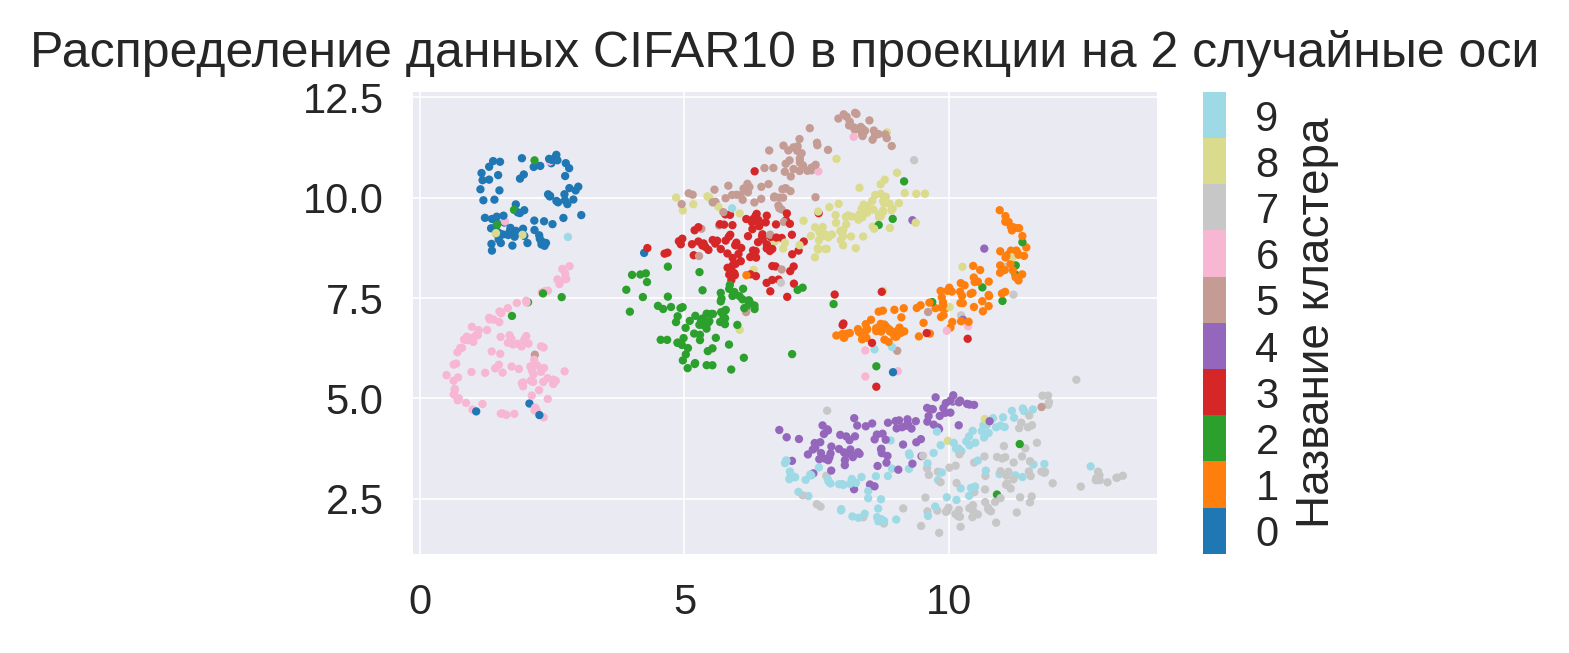

In [19]:
# Ваш код здесь:＼(º □ º l|l)/
plt.style.use("seaborn")
scaler = StandardScaler().fit(mnist_data_train)
reducer = UMAP(n_neighbors=15).fit(scaler.transform(mnist_data_train))
lowd_mnist_data_test = reducer.transform(scaler.transform(mnist_data_test))
plot_interactive(lowd_mnist_data_test, mnist_images_test, mnist_labels_test, names=np.arange(10), image_scale=0.4)

In [ ]:
# Если картинка окажется слишком маленькой/большой, то поменяйте image_scale на подходящее значение
plot_interactive(
    lowd_mnist_data_train, mnist_images_train, mnist_labels_train,
    mnist_test_dataset.classes, n_dots=2000, image_scale=0.35
)

Вернёмся в статичный режим отрисовки изображений:

In [20]:
%matplotlib inline
matplotlib.rcParams['figure.dpi'] = 300

----------------------------------------------
<font color="white" style="opacity:0.2023"></font>

#### <font color='DarkOrange'>**Задание 1.4 [код]**</font>

Разбейте выборку следующим образом:
1. Разбейте случайным образом обучающую выборку на 2 части — размеченную и неразмеченную. Считайте, что доля размеченных объектов — `fraction_of_labeled`. Метки неразмеченной части замените на $-1$.
2. Тестовую выборку разбейте в соотношении $30$ на $70$ — меньшую часть (далее будет называться **валидационной выборкой**) используйте для подбора гиперпараметров, а большую (**тестовая выборка**) для итоговой оценки качества.

In [21]:
fraction_of_labeled = 0.01

In [22]:
# Ваш код здесь:＼(º □ º l|l)/
fraction_of_labeled = 0.01
X_train_without_label, X_train_labeled, y_train_without_label, y_train_labeled = train_test_split(mnist_data_train, mnist_labels_train, test_size=fraction_of_labeled, random_state=42)
y_train_without_label[:] = -1
X_train, y_train = np.concatenate([X_train_without_label, X_train_labeled]), np.concatenate([y_train_without_label, y_train_labeled])
X_validation, X_test, y_validation, y_test = train_test_split(mnist_data_test, mnist_labels_test, test_size=0.7, random_state=42)


#### <font color='DarkOrange'>**Задание 1.5 [кросспроверка, 2 баллa][код]**</font>

Используя `MetaSemiSupervisedModel` подберите оптимальные параметры:

* `C` — не менее $15$ точек в диапазоне $5-6$ десятичных порядков
* `n_clusters` — не менее $10$ точек вплоть до $100$
* `n_components` — не менее $7$ точек вплоть до $100$

для следующих моделей:
1. Исходные признаки + `LogisticRegression`
2. Исходные признаки + `SelfTrainingClassifier`
3. Исходные признаки + `KMeansClassifier`
4. `UMAP` + `LogisticRegression`
5. `UMAP` + `SelfTrainingClassifier`
6. `UMAP` + `KMeansClassifier`

Подбор каждого гиперпараметра должен быть сопровождён графиками точности на тестовой и валидационной выборках. Изобразите обе линии на одном графике.

<font color='OrangeRed'>**Замечание:**</font> При переборе **обязательно выводите значение найденного оптимального параметра и качество модели с оптимальным гиперпараметром** на выборке для итоговой оценки качества.

В последних трёх моделях используйте гиперпараметры базовых моделей, найденные в первых трёх моделях.

In [ ]:
# Ваш код здесь:＼(º □ º l|l)/
from sklearn.metrics import accuracy_score

param_grid = {'LogisticRegression': {'C': np.logspace(-6, 2, 15)},
              'SelfTrainingClassifier': {'C': np.logspace(-6, 2, 15)},
              'KMeansClassifier': {'n_clusters': np.linspace(1, 100, 11, dtype=int)},
              'UMAPLogisticRegression': {'n_components': np.linspace(2, 100, 11, dtype=int)},
              'UMAPSelfTrainingClassifier': {'n_components': np.linspace(2, 200, 11, dtype=int)},
              'UMAPKMeansClassifier': {'n_components': np.linspace(2, 200, 11, dtype=int)}}

results = {'LogisticRegression': {'valid': [], 'test': []},
           'SelfTrainingClassifier': {'valid': [], 'test': []},
           'KMeansClassifier': {'valid': [], 'test': []},
           'UMAPLogisticRegression': {'valid': [], 'test': []},
           'UMAPSelfTrainingClassifier': {'valid': [], 'test': []},
           'UMAPKMeansClassifier': {'valid': [], 'test': []}}

best_params = {'LogisticRegression': {},
               'SelfTrainingClassifier': {},
               'KMeansClassifier': {},
               'UMAPLogisticRegression': {'metric': 'precomputed'},
               'UMAPSelfTrainingClassifier': {'metric': 'precomputed'},
               'UMAPKMeansClassifier': {'metric': 'precomputed'}}

for model_name in ['LogisticRegression', 'SelfTrainingClassifier', 'KMeansClassifier']:
    param_range = param_grid[model_name]
    param_name = list(param_range)[0]
    for param_val in param_range[param_name]:
        model = MetaSemiSupervisedModel(
            data_processing=None,
            model=model_name,
            reducer_kwargs={},
            model_kwargs={param_name: param_val}
        ).fit(X_train, y_train)

        results[model_name]['valid'].append(accuracy_score(y_validation, model.predict(X_validation)))
        results[model_name]['test'].append(accuracy_score(y_test, model.predict(X_test)))

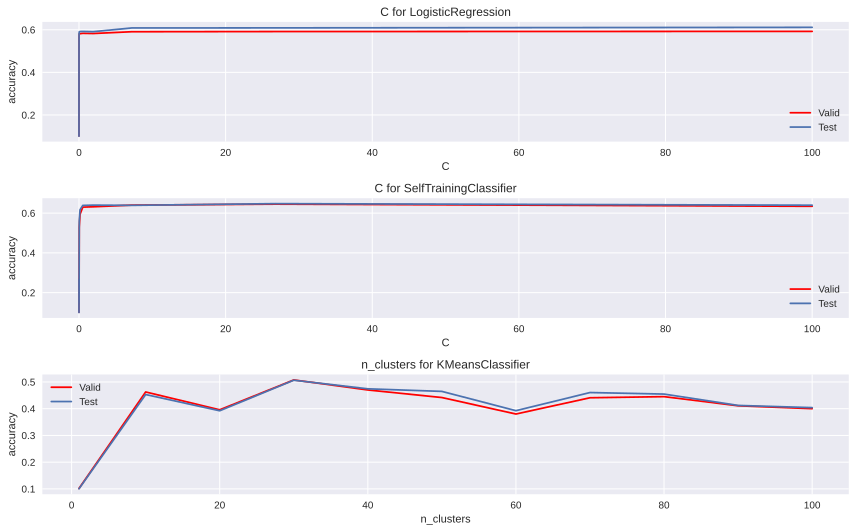

In [31]:
%config InlineBackend.figure_format = 'svg'
fig, ax = plt.subplots(3)
fig.set_size_inches(12, 7.5)
for i, model in enumerate(['LogisticRegression', 'SelfTrainingClassifier', 'KMeansClassifier']):
    param_range = param_grid[model]
    param_name = list(param_range)[0]
    param_range = param_range[param_name]
    ax[i].set_title(f'{param_name} for {model}')
    ax[i].plot(param_range, results[model]['valid'], label='Valid', color = 'r')
    ax[i].plot(param_range, results[model]['test'], label='Test')
    ax[i].set_ylabel('accuracy')
    ax[i].set_xlabel(param_name)
    ax[i].legend()
plt.tight_layout()
plt.show()

In [33]:
for i, model in enumerate(['LogisticRegression', 'SelfTrainingClassifier', 'KMeansClassifier']):
    param_range = param_grid[model]
    param_name = list(param_range)[0]
    param_range = param_range[param_name]

    best_model_idx = np.argmax(results[model]['valid'])
    best_params[model][param_name] = param_range[best_model_idx]
    acc_on_test = results[model]['test'][best_model_idx]

    print(f"Значение {param_name} для {model}: {best_params[model][param_name]}")
    print(f"Значение accuracy на тестовой выборке: {acc_on_test}\n")

Значение C для LogisticRegression: 100.0
Значение accuracy на тестовой выборке: 0.6114285714285714

Значение C для SelfTrainingClassifier: 26.82695795279722
Значение accuracy на тестовой выборке: 0.6475

Значение n_clusters для KMeansClassifier: 30
Значение accuracy на тестовой выборке: 0.5064285714285715



In [ ]:
from sklearn.metrics import pairwise_distances

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_validation_scaled = scaler.transform(X_validation)
X_test_scaled = scaler.transform(X_test)

X_train_dist = pairwise_distances(X_train_scaled)
X_validation_dist = pairwise_distances(X_validation_scaled, X_train_scaled)
X_test_dist = pairwise_distances(X_test_scaled, X_train_scaled)

for model_name in ['UMAPLogisticRegression', 'UMAPSelfTrainingClassifier', 'UMAPKMeansClassifier']:
    param_range = param_grid[model_name]
    param_name = list(param_range)[0]
    for param_val in param_range[param_name]:
        model = MetaSemiSupervisedModel(
            data_processing='UMAP',
            model=model_name.split('UMAP')[1],
            reducer_kwargs={param_name: param_val, 'metric': 'precomputed'},
            model_kwargs=best_params[model_name.split('UMAP')[1]]
        ).fit(X_train_dist, y_train)

        results[model_name]['valid'].append(accuracy_score(y_validation, model.predict(X_validation_dist)))
        results[model_name]['test'].append(accuracy_score(y_test, model.predict(X_test_dist)))

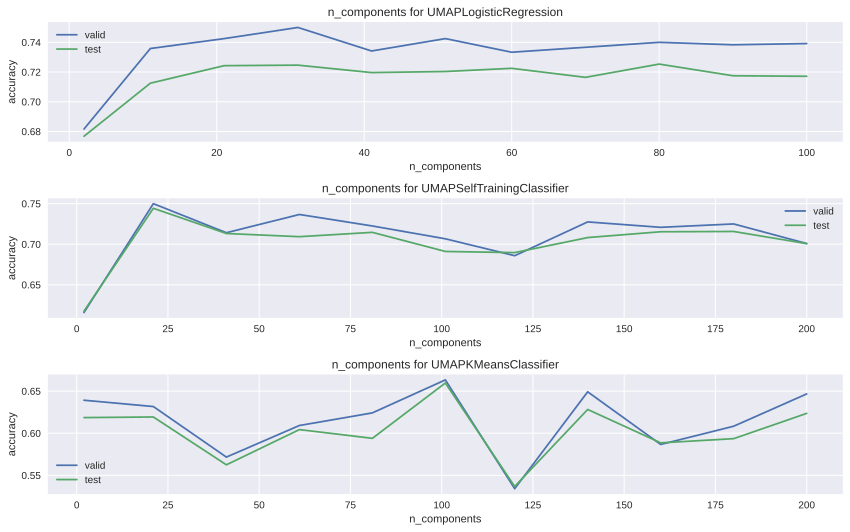

In [35]:
fig, ax = plt.subplots(3)
fig.set_size_inches(12, 7.5)
for i, model in enumerate(['LogisticRegression', 'SelfTrainingClassifier', 'KMeansClassifier']):
    param_range = param_grid['UMAP' + model]
    param_name = list(param_range)[0]
    param_range = param_range[param_name]
    ax[i].set_title(f'{param_name} for {"UMAP" + model}')
    ax[i].plot(param_range, results['UMAP' + model]['valid'], label='valid')
    ax[i].plot(param_range, results['UMAP' + model]['test'], label='test')
    ax[i].set_ylabel('accuracy')
    ax[i].set_xlabel(param_name)
    ax[i].legend()
plt.tight_layout()
plt.show()

In [36]:
for i, model in enumerate(['LogisticRegression', 'SelfTrainingClassifier', 'KMeansClassifier']):
    param_range = param_grid['UMAP' + model]
    param_name = list(param_range)[0]
    param_range = param_range[param_name]

    best_model_idx = np.argmax(results['UMAP' + model]['valid'])
    best_params['UMAP' + model][param_name] = param_range[best_model_idx]
    acc_on_test = results['UMAP' + model]['test'][best_model_idx]

    print(f"Значение {param_name} для {model}: {best_params['UMAP' + model][param_name]}")
    print(f"Значение accuracy на тестовой выборке: {acc_on_test}\n")

Значение n_components для LogisticRegression: 31
Значение accuracy на тестовой выборке: 0.7246428571428571

Значение n_components для SelfTrainingClassifier: 21
Значение accuracy на тестовой выборке: 0.7442857142857143

Значение n_components для KMeansClassifier: 101
Значение accuracy на тестовой выборке: 0.6596428571428572



In [37]:
best_params

{'LogisticRegression': {'C': 100.0},
 'SelfTrainingClassifier': {'C': 26.82695795279722},
 'KMeansClassifier': {'n_clusters': 30},
 'UMAPLogisticRegression': {'metric': 'precomputed', 'n_components': 31},
 'UMAPSelfTrainingClassifier': {'metric': 'precomputed', 'n_components': 21},
 'UMAPKMeansClassifier': {'metric': 'precomputed', 'n_components': 101}}

#### <font color='DarkOrange'>**Задание 1.6 [кросспроверка, 2 баллa][вопрос]**</font>

Опишите полученные результаты. Какая модель проявила себя лучше всего? Как влияет на результат снижение размерности признакового пространства?

<font color='MediumOrchid'>**Ваш ответ тут:**</font> (ｏ・_・)ノ”(ノ_<、)
Лучше всех себя показала модель UMAPSelfTrainingClassifier, но совсем немного ей уступила UMAPLogisticRegression — скорее всего, из-за шумов они могут менять друг друга на первом месте. Видно, что использование UMAP заметно улучшает качество моделей. Но за это приходится платить временем


#### <font color='DarkOrange'>**Задание 1.7 [кросспроверка, 1 балл][код]**</font>

Обучите каждую из шести моделей на выборках с разной долей размеченных объектов. Используйте оптимальные параметры из предыдущего пункта. Изобразите итоговое качество в зависимости от доли размеченных объектов для всех моделей на одном графике.

Используйте сетку для перебора, указанную ниже. При желании можете взять больше точек.

In [52]:
fraction_of_labeled_range = [0.005, 0.01, 0.05, 0.1, 0.2, 0.5, 0.7, 0.99]

In [ ]:
# Ваш код здесь:＼(º □ º l|l)/
# Ваш код здесь:＼(º □ º l|l)/
results = {
    'LogisticRegression': [],
    'SelfTrainingClassifier': [],
    'KMeansClassifier': [],
    'UMAPLogisticRegression': [],
    'UMAPSelfTrainingClassifier': [],
    'UMAPKMeansClassifier': []
}

for fraction in fraction_of_labeled_range:
    X_train_without_label, X_train_labeled, y_train_without_label, y_train_labeled = train_test_split(mnist_data_train, mnist_labels_train, test_size=fraction, random_state=42)

    y_train_without_label[:] = -1
    X_train, y_train = np.concatenate([X_train_without_label, X_train_labeled]), np.concatenate([y_train_without_label, y_train_labeled])

    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    X_train_dist = pairwise_distances(X_train_scaled)
    X_test_dist = pairwise_distances(X_test_scaled, X_train_scaled)

    for model_name in ['LogisticRegression', 'SelfTrainingClassifier', 'KMeansClassifier']:
        model = MetaSemiSupervisedModel(
            model=model_name,
            model_kwargs=best_params[model_name],
            data_processing=None,
            reducer_kwargs={}
        ).fit(X_train, y_train)

        umap_model = MetaSemiSupervisedModel(
            model=model_name,
            data_processing='UMAP',
            model_kwargs=best_params[model_name],
            reducer_kwargs=best_params['UMAP' + model_name]
        ).fit(X_train_dist, y_train)

        results[model_name].append(accuracy_score(y_test, model.predict(X_test)))
        results['UMAP' + model_name].append(accuracy_score(y_test, umap_model.predict(X_test_dist)))

In [49]:
results['KMeansClassifier']

[0.21464285714285714,
 0.5064285714285715,
 0.6146428571428572,
 0.6575,
 0.6310714285714286,
 0.6667857142857143,
 0.6467857142857143,
 0.6378571428571429]

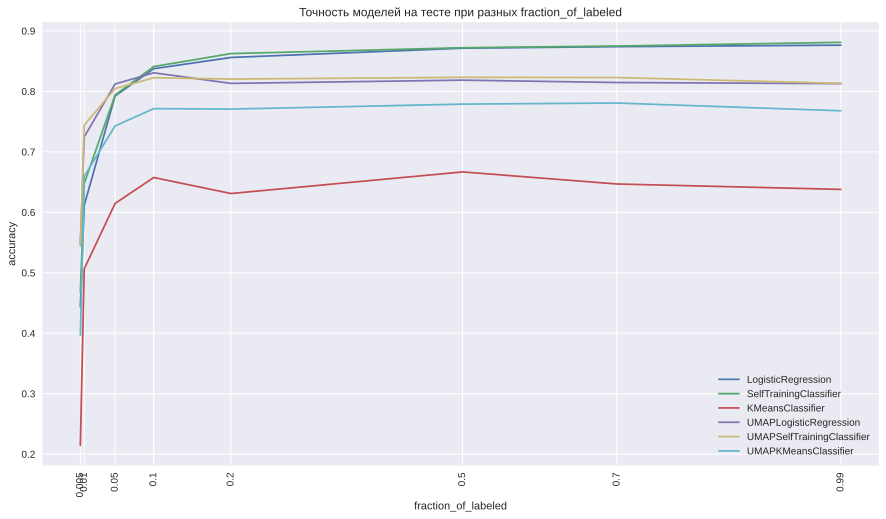

In [55]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.set_title('Точность моделей на тесте при разных fraction_of_labeled')
for i, model_name in enumerate(['LogisticRegression', 'SelfTrainingClassifier', 'KMeansClassifier']):
    ax.plot(fraction_of_labeled_range, results[model_name], label=model_name)
for i, model_name in enumerate(['LogisticRegression', 'SelfTrainingClassifier', 'KMeansClassifier']):
    ax.plot(fraction_of_labeled_range, results['UMAP' + model_name], label='UMAP' + model_name)

ax.legend()
ax.set_xticks(fraction_of_labeled_range, fraction_of_labeled_range)
ax.set_xlabel('fraction_of_labeled')
ax.set_ylabel('accuracy')
plt.xticks(rotation=90)
plt.show()

#### <font color='DarkOrange'>**Задание 1.8 [кросспроверка, 1 балл][вопрос]**</font>

Как разные модели ведут себя в зависимости от объёма размеченных данных? Какой размер выборки достаточно разметить, чтобы получить близкое к максимальному качество? В каких случаях может быть выгодно использовать методы снижения размерности?

<font color='MediumOrchid'>**Ваш ответ тут:**</font> (ｏ・_・)ノ”(ノ_<、)

    1. LogisticRegression показывает устойчивый, монотонный рост точности по мере увеличения доли разметки. Это ожидаемо, так как она обучается исключительно на размеченных данных.

    2. SelfTrainingClassifier сначала растёт быстрее, чем LogisticRegression, благодаря использованию неразмеченных данных. Но по мере роста доли размеченной выборки её поведение становится похожим на обычную логистическую регрессию. Это логично, так как внутри SelfTraining используется LogisticRegression. Поэтому разница между ними постепенно сглаживается.

    3. KMeansClassifier при малом объёме разметки показывает результаты, сравнимые с другими моделями. Однако с ростом доли размеченных данных начинает сильно уступать. В целом модель показывает нестабильное поведение, что объясняется трудностью кластеризации на «сырых» пиксельных данных.

    4. У модели UMAPLogisticRegression качество начинает снижаться после отметки 0.1. Возможно, причина в том, что при увеличении числа объектов UMAP теряет часть информации, не очень эффективно выделяя признаки из изображений.

    5. UMAPSelfTrainingClassifier сначала работает лучше обычного SelfTrainingClassifier, но потом обычная модель обгоняет его. Интересный момент: при стремлении доли размеченных данных к 1, она начинает совпадать с UMAPLogisticRegression, как и в случае без UMAP.

    6. UMAPKMeansClassifier уверенно обгоняет обычный KMeans на малых долях разметки и сначала растёт довольно быстро, но позже начинает сильно отставать от остальных моделей. Скорее всего, это снова связано с тем, что UMAP не всегда хорошо справляется с выделением признаков при увеличении числа объектов и сложности кластеров.



----------------------------------------------
<font color="white" style="opacity:0.2023"></font>

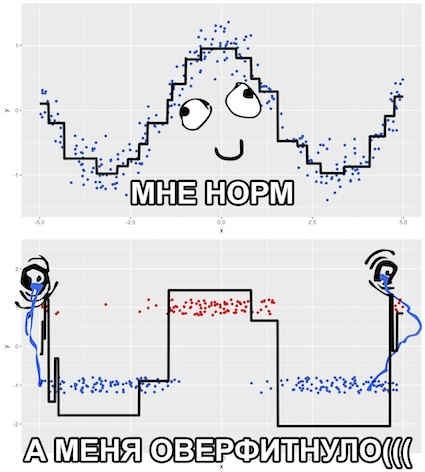